In [0]:
from keras.datasets import mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

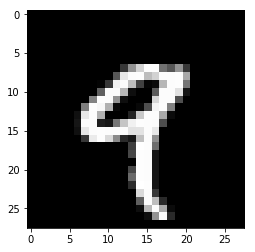

In [0]:
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(train_images[4], cmap='gray')
plt.show()

In [0]:
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [0]:
print(train_images.shape)
print(test_images.shape)

train_images= (train_images.reshape((60000,28*28))).astype("float32") / 255
test_images= (test_images.reshape((10000,28*28))).astype("float32") / 255

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [0]:
train_images.shape[1]

784

In [0]:
from keras.utils import to_categorical

train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [0]:
from keras import models
from keras.layers import Dense, Conv1D

network = models.Sequential()
network.add(Dense(512,activation="relu", input_shape =(train_images.shape[1],)))
network.add(Dense(10,activation="softmax"))

network.summary()

network.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=["accuracy"])

history = network.fit(train_images,train_labels, epochs=10, batch_size = 128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.2978 - acc: 0.9142 - val_loss: 0.1606 - val_acc: 0.9540
Epoch 2/10
48000/48000 [==============================] - 1s 27us/step - loss: 0.1218 - acc: 0.9650 - val_loss: 0.1076 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.0812 - acc: 0.9759 - val_loss: 0.0925 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 1s 27us/step 

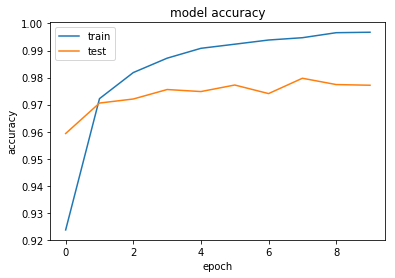

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

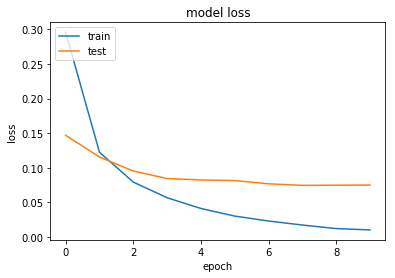

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convolutional NN

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_norm = X_train.astype('float32') / 255
X_test_norm = X_test.astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10) # We have 10 classes to codify
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
traintensor = X_train_norm.reshape(60000, 28, 28, 1)
testtensor = X_test_norm.reshape(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten

img_rows = 28
img_cols = 28
kernel_size = 3 # Size of the kernel for the convolution layers
pool_size = 2 # Size of the pooling region for the pooling layers

model = Sequential()

model.add(Convolution2D(32, # Number convolution channels to generate (like 32 neuronas)
                        (kernel_size, kernel_size), # Size of convolution kernels (3x3)
                        padding='valid', # Strategy to deal with borders
                        input_shape=(img_rows, img_cols, 1))) # Size = image rows x image columns x channels  (28x28x1)

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) #2x2
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history=model.fit(
    traintensor, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2, # Level of verbosity of the log messages
    validation_split=0.2
)

score = model.evaluate(testtensor, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                54090     
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total para

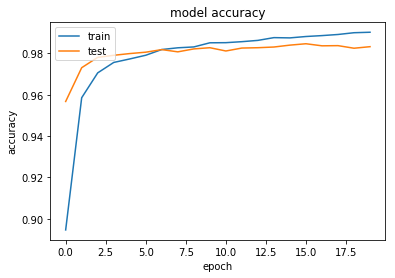

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

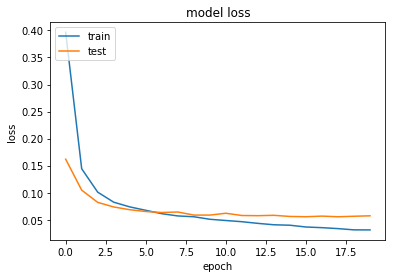

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()